# DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

## Objective:
#### This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.
## Dataset:
#### Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.
#### Tasks:
### 1. Data Exploration and Preprocessing:
#### •	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
#### •	Handle missing values as per the best practices (imputation, removal, etc.).
#### •	Apply scaling techniques to numerical features:
#### •	Standard Scaling
#### •	Min-Max Scaling
#### •	Discuss the scenarios where each scaling technique is preferred and why.


In [1]:
import pandas as pd

df = pd.read_csv("adult_with_headers.csv")

df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


(None,
    age          workclass  fnlwgt   education  education_num  \
 0   39          State-gov   77516   Bachelors             13   
 1   50   Self-emp-not-inc   83311   Bachelors             13   
 2   38            Private  215646     HS-grad              9   
 3   53            Private  234721        11th              7   
 4   28            Private  338409   Bachelors             13   
 
         marital_status          occupation    relationship    race      sex  \
 0        Never-married        Adm-clerical   Not-in-family   White     Male   
 1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
 2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
 3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
 4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
 
    capital_gain  capital_loss  hours_per_week  native_country  income  
 0          2174             0              40

In [6]:
placeholder_counts = (df == ' ?').sum()

placeholder_counts[placeholder_counts > 0]

workclass         1836
occupation        1843
native_country     583
dtype: int64

In [9]:
for col in ["workclass", "occupation", "native_country"]:
    df[col] = df[col].replace(" ?", df[col].mode()[0])

(df == " ?").sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

num_cols = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]

standard_scaler = StandardScaler()
df_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df[num_cols]), columns=num_cols)

minmax_scaler = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(df[num_cols]), columns=num_cols)

df_comparison = df[num_cols].head().copy()
df_comparison["age_standard"] = df_standard_scaled["age"].head()
df_comparison["age_minmax"] = df_minmax_scaled["age"].head()
df_comparison

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,age_standard,age_minmax
0,39,77516,13,2174,0,40,0.030671,0.301370
1,50,83311,13,0,0,13,0.837109,0.452055
2,38,215646,9,0,0,40,-0.042642,0.287671
3,53,234721,7,0,0,40,1.057047,0.493151
4,28,338409,13,0,0,40,-0.775768,0.150685


### 2. Encoding Techniques:
#### •	Apply One-Hot Encoding to categorical variables with less than 5 categories.
#### •	Use Label Encoding for categorical variables with more than 5 categories.
#### •	Discuss the pros and cons of One-Hot Encoding and Label Encoding.


In [12]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ["workclass", "education", "marital_status", "occupation", "relationship", 
            "race", "sex", "native_country", "income"]

unique_counts = {col: df[col].nunique() for col in cat_cols}
unique_counts


{'workclass': 8,
 'education': 16,
 'marital_status': 7,
 'occupation': 14,
 'relationship': 6,
 'race': 5,
 'sex': 2,
 'native_country': 41,
 'income': 2}

In [14]:
from sklearn.preprocessing import OneHotEncoder

one_hot_cols = ["race", "sex", "income"]
df_one_hot = pd.get_dummies(df[one_hot_cols], drop_first=True)  # drop_first=True avoids multicollinearity

label_cols = ["workclass", "education", "marital_status", "occupation", "relationship", "native_country"]
label_encoders = {col: LabelEncoder() for col in label_cols}

df_label_encoded = df[label_cols].apply(lambda col: label_encoders[col.name].fit_transform(col))

df_final = pd.concat([df.drop(columns=cat_cols), df_label_encoded, df_one_hot], axis=1)

df_final.head()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,native_country,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K
0,39,77516,13,2174,0,40,6,9,4,0,1,38,0,0,0,1,1,0
1,50,83311,13,0,0,13,5,9,2,3,0,38,0,0,0,1,1,0
2,38,215646,9,0,0,40,3,11,0,5,1,38,0,0,0,1,1,0
3,53,234721,7,0,0,40,3,1,2,5,0,38,0,1,0,0,1,0
4,28,338409,13,0,0,40,3,9,2,9,5,4,0,1,0,0,0,0


## Pros and Cons:
### One-Hot Encoding:
### Pros:
#### Prevents ordinal misinterpretation (e.g., "Private" is not greater than "Self-Employed").
#### Works well with models that assume categorical independence (e.g., Linear Regression, Neural Networks).

### Cons:
#### Increases dataset size if many unique categories exist.
#### Can lead to sparse data issues.

### Label Encoding:
### Pros:
#### More memory-efficient.
#### Preserves ordinal relationships if they exist.

### Cons:
#### Can introduce misleading ordinal relationships where none exist.
#### Not ideal for non-tree models (e.g., Logistic Regression) due to arbitrary numerical assignments.

## 3. Feature Engineering:
#### •	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
#### •	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.


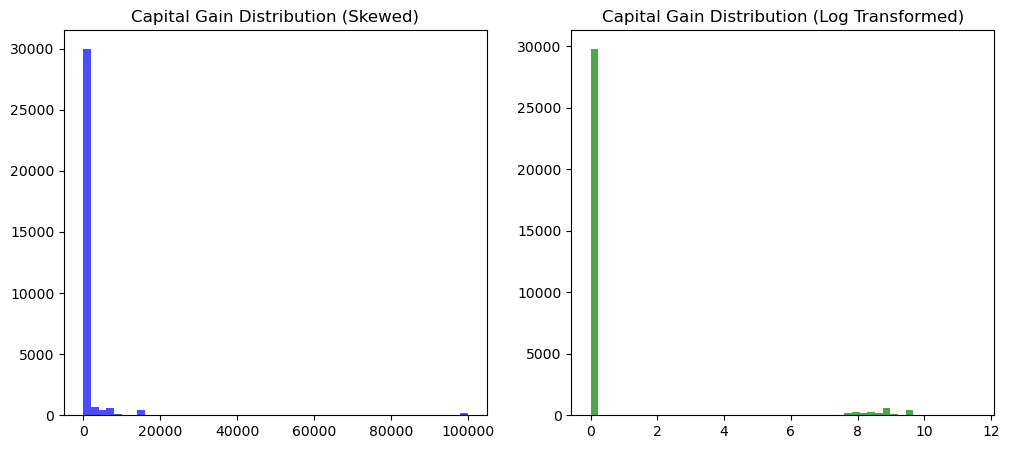

In [22]:
import numpy as np
import matplotlib.pyplot as plt

df_final["income_ratio"] = df["capital_gain"] / (df["hours_per_week"] + 1)  # Avoid division by zero
df_final["work_experience"] = df["age"] - df["education_num"]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df["capital_gain"], bins=50, color="blue", alpha=0.7)
plt.title("Capital Gain Distribution (Skewed)")

df_final["capital_gain_log"] = np.log1p(df["capital_gain"])  # log1p(x) = log(x + 1) to handle zeros

plt.subplot(1, 2, 2)
plt.hist(df_final["capital_gain_log"], bins=50, color="green", alpha=0.7)
plt.title("Capital Gain Distribution (Log Transformed)")

plt.show()

### New Features Created:
#### Income-to-Hours Ratio: Helps distinguish high earners working fewer hours.
#### Work Experience Level: Approximate work experience based on age and education.
    
### Log Transformation on capital_gain:
#### The original distribution was highly skewed (most values were near zero).
#### Applying log transformation (log1p) made the distribution more normal, which helps models that assume normality (e.g., linear regression).

### 4. Feature Selection:
#### •	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
#### •	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.


#### Outliers can negatively impact model performance by:
#### Skewing feature distributions (causing instability in models like linear regression).
#### Reducing model generalization (models may learn noise instead of patterns).
#### Affecting distance-based models (e.g., KNN, clustering).

In [23]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.01, random_state=42)  # Assuming 1% contamination (outliers)
outlier_preds = iso_forest.fit_predict(df_final)

df_final["outlier"] = outlier_preds

outlier_counts = df_final["outlier"].value_counts()
outlier_counts

 1    31912
-1      323
Name: outlier, dtype: int64

In [24]:
# Remove outliers
df_final = df_final[df_final["outlier"] == 1].drop(columns=["outlier"])

# Verify removal
df_final.shape


(31912, 21)

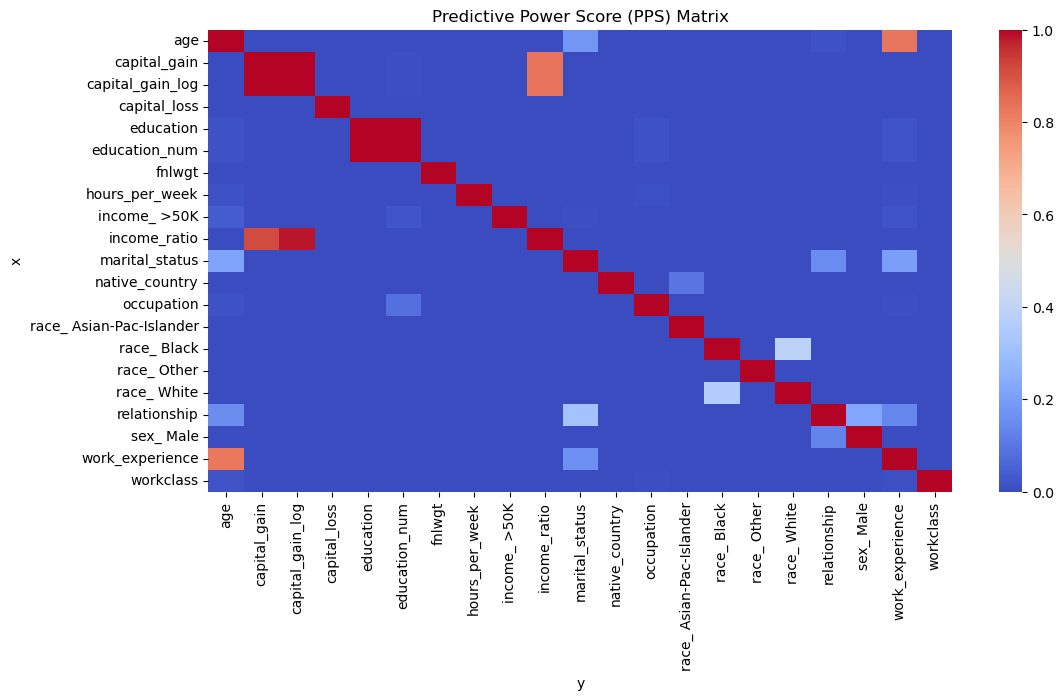

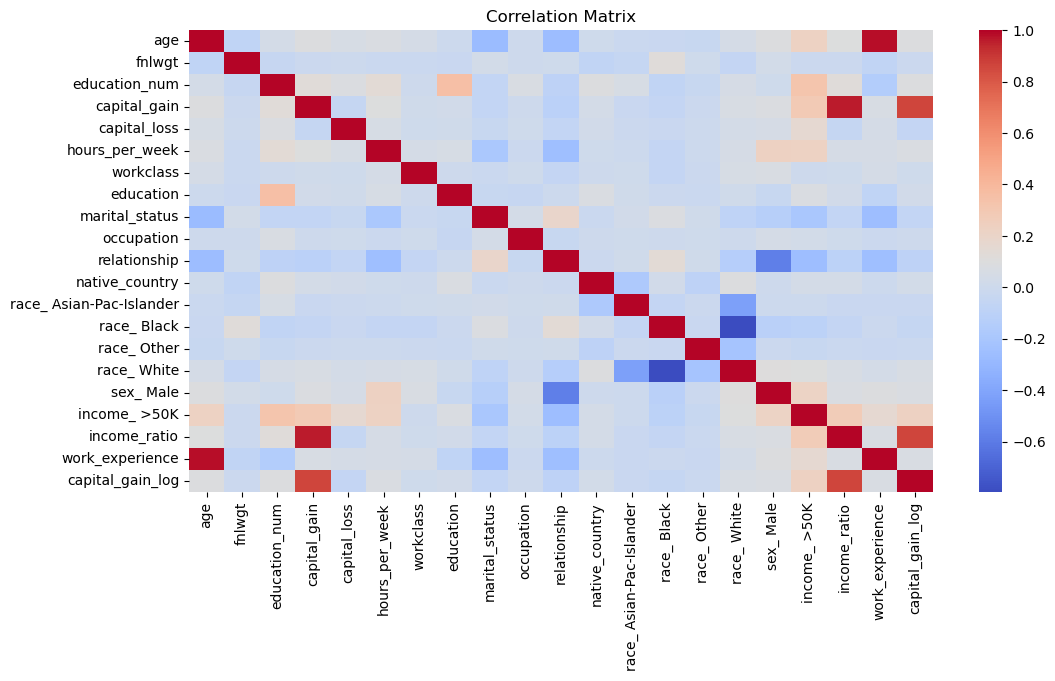

In [25]:
import ppscore as pps
import seaborn as sns

# Compute PPS matrix
pps_matrix = pps.matrix(df_final).pivot(index="x", columns="y", values="ppscore")

# Compute correlation matrix
corr_matrix = df_final.corr(numeric_only=True)

# Plot PPS heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pps_matrix, cmap="coolwarm", annot=False)
plt.title("Predictive Power Score (PPS) Matrix")
plt.show()

# Plot Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()
